In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
from matplotlib import pyplot as plt

In [10]:
%matplotlib inline
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

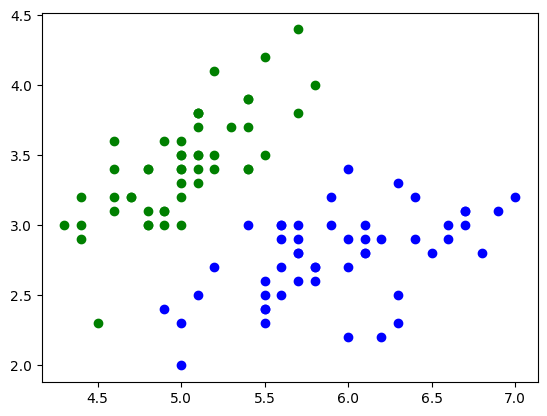

In [11]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue")
# plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="red")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop(["target", "flower_name"], axis="columns")
y = df.target

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
len(x_train)

120

In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [17]:
model.score(x_test,y_test)
y_predicted = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]], dtype=int64)

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(50.722222222222214, 0.5, 'predicted value')

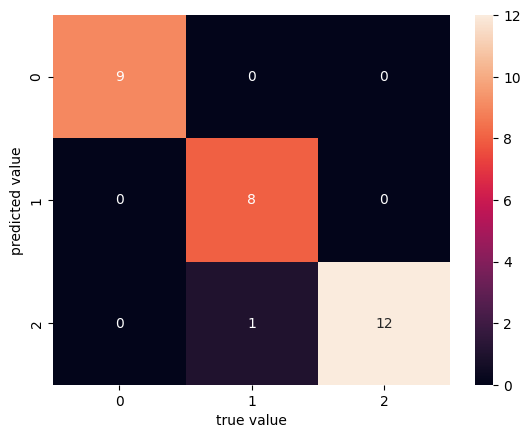

In [21]:
plt.Figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("true value")
plt.ylabel("predicted value")